In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:10], len(words)

(['emma',
  'olivia',
  'ava',
  'isabella',
  'sophia',
  'charlotte',
  'mia',
  'amelia',
  'harper',
  'evelyn'],
 32033)

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [59]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words:

  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
# for x, y in zip(X, Y):
#   print(x, '->', y.item())

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
C = torch.randn((27, 2)) # each of the 27 characters will have a 2 dimensional embedding

In [9]:
C[5]

tensor([ 0.0356, -0.1503])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.0356, -0.1503])

In [11]:
# (1 * 27) @ (27 * 2) -> 1 * 2

In [12]:
C[[5, 6, 7]]

tensor([[ 0.0356, -0.1503],
        [-0.4798,  1.2005],
        [ 0.0516,  2.4316]])

In [13]:
F.one_hot(torch.tensor([5, 6, 7]), num_classes=27).float() @ C

tensor([[ 0.0356, -0.1503],
        [-0.4798,  1.2005],
        [ 0.0516,  2.4316]])

In [14]:
X, X.shape

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 torch.Size([32, 3]))

In [15]:
C[X], C[X].shape

(tensor([[[-1.4572,  2.0120],
          [-1.4572,  2.0120],
          [-1.4572,  2.0120]],
 
         [[-1.4572,  2.0120],
          [-1.4572,  2.0120],
          [ 0.0356, -0.1503]],
 
         [[-1.4572,  2.0120],
          [ 0.0356, -0.1503],
          [-1.6210, -0.8542]],
 
         [[ 0.0356, -0.1503],
          [-1.6210, -0.8542],
          [-1.6210, -0.8542]],
 
         [[-1.6210, -0.8542],
          [-1.6210, -0.8542],
          [ 0.6297,  0.9300]],
 
         [[-1.4572,  2.0120],
          [-1.4572,  2.0120],
          [-1.4572,  2.0120]],
 
         [[-1.4572,  2.0120],
          [-1.4572,  2.0120],
          [ 0.3715, -0.4987]],
 
         [[-1.4572,  2.0120],
          [ 0.3715, -0.4987],
          [-1.3022,  0.2746]],
 
         [[ 0.3715, -0.4987],
          [-1.3022,  0.2746],
          [-0.2325,  1.1563]],
 
         [[-1.3022,  0.2746],
          [-0.2325,  1.1563],
          [-0.4916,  2.0506]],
 
         [[-0.2325,  1.1563],
          [-0.4916,  2.0506],
          

In [16]:
X[13, 2]

tensor(1)

In [17]:
C[X][13, 2]

tensor([0.6297, 0.9300])

In [18]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [19]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)      # 6 = 2 * 3, 100 is the number of neurons

In [20]:
# emb @ W1 + b1

In [21]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [22]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [23]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [24]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [25]:
a.storage(), a.untyped_storage()

<ipython-input-25-74963e578f9d>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage(), a.untyped_storage()


( 0
  1
  2
  3
  4
  5
  6
  7
  8
  9
  10
  11
  12
  13
  14
  15
  16
  17
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18],
  0
  0
  0
  0
  0
  0
  0
  0
  1
  0
  0
  0
  0
  0
  0
  0
  2
  0
  0
  0
  0
  0
  0
  0
  3
  0
  0
  0
  0
  0
  0
  0
  4
  0
  0
  0
  0
  0
  0
  0
  5
  0
  0
  0
  0
  0
  0
  0
  6
  0
  0
  0
  0
  0
  0
  0
  7
  0
  0
  0
  0
  0
  0
  0
  8
  0
  0
  0
  0
  0
  0
  0
  9
  0
  0
  0
  0
  0
  0
  0
  10
  0
  0
  0
  0
  0
  0
  0
  11
  0
  0
  0
  0
  0
  0
  0
  12
  0
  0
  0
  0
  0
  0
  0
  13
  0
  0
  0
  0
  0
  0
  0
  14
  0
  0
  0
  0
  0
  0
  0
  15
  0
  0
  0
  0
  0
  0
  0
  16
  0
  0
  0
  0
  0
  0
  0
  17
  0
  0
  0
  0
  0
  0
  0
 [torch.storage.UntypedStorage(device=cpu) of size 144])

In [26]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [27]:
h = emb.view(emb.shape[0], 6) @ W1 + b1
# h = emb.view(-1, 6) @ W1 + b1

In [28]:
h.shape

torch.Size([32, 100])

In [29]:
h

tensor([[-5.3221, -6.1432,  6.2222,  ...,  3.5283, -3.5686,  2.2217],
        [-5.1802, -1.3196,  5.0880,  ...,  0.6462, -3.9298,  2.9416],
        [-3.2416, -1.9303,  7.1853,  ...,  0.8145, -1.3242,  4.1293],
        ...,
        [ 1.6858,  2.3188,  0.3882,  ...,  1.1542,  1.1817, -0.6233],
        [ 0.3988, -0.5593, -1.8832,  ...,  1.7920,  2.9210, -1.5235],
        [-1.4290,  0.5441, -0.8013,  ...,  0.0119, -2.0200, -1.3211]])

In [30]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [31]:
h

tensor([[-1.0000, -1.0000,  1.0000,  ...,  0.9983, -0.9984,  0.9768],
        [-0.9999, -0.8667,  0.9999,  ...,  0.5691, -0.9992,  0.9944],
        [-0.9969, -0.9588,  1.0000,  ...,  0.6721, -0.8678,  0.9995],
        ...,
        [ 0.9336,  0.9808,  0.3698,  ...,  0.8192,  0.8280, -0.5534],
        [ 0.3789, -0.5074, -0.9548,  ...,  0.9460,  0.9942, -0.9093],
        [-0.8915,  0.4961, -0.6648,  ...,  0.0119, -0.9654, -0.8671]])

In [32]:
h.shape

torch.Size([32, 100])

In [33]:
(emb.view(-1, 6) @ W1).shape, b1.shape

(torch.Size([32, 100]), torch.Size([100]))

In [34]:
# 32 100
# 1  100

In [35]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [36]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [37]:
logits

tensor([[-1.0035e+01, -1.3069e+01,  1.6312e+00, -7.7778e+00, -1.1878e+01,
          1.5836e+01,  7.3069e+00, -3.8401e+00,  5.4446e+00,  1.7312e+01,
         -7.8870e+00,  4.8268e+00,  9.9519e+00, -1.5737e+01,  1.1791e+00,
          6.7266e+00,  9.1555e+00, -1.0624e+01,  5.0762e+00,  1.2115e+01,
          9.1766e+00,  6.3921e+00,  1.5726e+00, -1.0778e+01,  4.2149e+00,
          1.6092e+01, -1.5979e+01],
        [ 2.7592e+00,  1.3634e+01,  1.7497e+01, -7.1199e+00, -1.2248e+01,
          2.2871e+01,  1.8627e+00, -1.4504e+01,  1.0235e+01,  1.6071e+01,
          4.6268e+00,  1.0074e+00,  1.5162e+01, -5.9869e+00,  4.6985e+00,
         -5.4770e+00,  5.0941e+00,  1.2023e+00,  5.5409e+00,  2.9111e+00,
          6.9465e+00,  9.6630e-01, -8.5900e+00, -1.3010e+00,  5.5868e+00,
          1.1267e+01, -1.8992e+01],
        [-7.6813e+00, -6.3442e+00,  1.0929e+01, -3.5826e+00, -8.9610e+00,
          2.2714e+00, -1.6937e+00, -1.3010e+01,  4.5236e+00,  1.1146e+00,
          1.0980e+00,  7.1815e+00, -3.76

In [38]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [39]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [40]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [41]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(17.4796)

In [42]:
# polished code

In [110]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [111]:
# sum(p.nelement() for p in parameters)

In [112]:
# # forward pass
# emb = C[X]
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# logits = h @ W2 + b2
# # counts = logits.exp()
# # probs = counts / counts.sum(1, keepdim=True)
# # loss = -probs[torch.arange(32), Y].log().mean()
# loss = F.cross_entropy(logits, Y)
# loss

In [113]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre
# lrs

In [117]:
# lri = []
# lossi = []

for p in parameters:
  p.requires_grad = True

for i in range(10000):
  # minibatch construction
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])


  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.01 # 0.1 for early epochs (as determined by lr tracking), 0.01 and 0.001 for later epochs
  for p in parameters:
    p.data -= lr * p.grad

  # track stats
  # lri.append(lr)
  # # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

1.9414913654327393


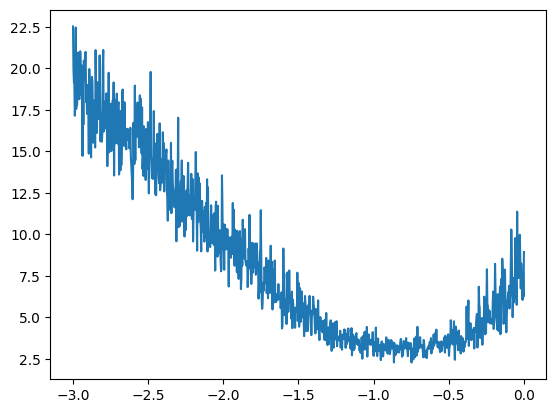

In [102]:
# plt.plot(lri, lossi);

In [69]:
# logits.max(1)

In [70]:
# Y

In [76]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5610, grad_fn=<NllLossBackward0>)